<a href="https://colab.research.google.com/github/JinwangMok/UNI_data_anaysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📕 data_analysis.ipynb

>## Information
>
>> Semester : `2022년 1학기`
>>
>> Class : `데이터 분석 이론 및 실습`
>>
>> Team : `장바구니`
>>
>> Author : `목진왕`


```
본 노트북은 이전 노트북에서 전처리된 csv 데이터를 실제로 분석하는 노트북입니다.
```

> ## Preview
> 
>> #### 🗃 개요
>>
>> [이전 노트북📘](https://colab.research.google.com/drive/1knvqmepGtxcFVXDeA7AXdHiHZMaZr3tY#scrollTo=j2Ht1ssG0ouc)에서 가공한 csv 파일은 총 4개입니다.
>>>- ASOS\_고창군\_기상데이터.csv
>>>
>>>- ASOS\_순창군\_기상데이터.csv
>>>
>>>- ASOS\_정읍\_기상데이터.csv
>>>
>>>- 복분자\_가격\_데이터.csv
>>
>> 이를 통해 분석하고자 하는 가설✍🏼은 아래와 같습니다.
>>
>>> 1️⃣
>>> 
>>> `겨울철(12~1월) 일교차`에 따라 복분자 `생산량이 감소`할 것으로 예상되므로 품귀 현상이 발생해 `가격이 상승`할 것이다.
>>
>>> 2️⃣  
>>>
>>> 겨울이 지나고 `3월부터 수확철인 8월까지`의 `지면 30cm 온도가 높을 수록` 낮과 밤의 일교차로 인한 습도가 증가할 수 있으므로 `생산량이 떨어져` `가격이 상승`할 것이다.
>>
>>> 3️⃣
>>> 
>>> 겨울이 지나고 `3월부터 수확철인 8월까지`의 `강수량이 증가`하면 `생산량이 떨어져` `가격이 상승`할 것이다.`
>> 

## 0. 💼 Before we start...

시작하기 전에 먼저 필요한 라이브러리들과 데이터를 불러오고 저장하기 용이하도록 구글 드라이브를 마운트하도록 하겠습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


> 앞서 전처리한 csv 파일을 저장한 디렉토리를 `DATA_PATH`로 지정합니다.
>
> (아래의 코드는 제 디렉토리 구조를 따르므로 이점 참고해주시길 바랍니다.)

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Classroom/[데이터분석 이론 및 실습(01)-강윤희] 컴퓨터공학부-2022-1/22-1_텀프로젝트/DATA/"

> Colab 환경에서 시각화를 하기 위해서는 한글 폰트 표현을 위한 몇가지 준비사항이 필요합니다.
>
> 먼저 아래의 리눅스 명령어로 나눔 글꼴을 다운로드 받습니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

> 다운로드가 완료되었다면 런타임 ➡ 런타임 다시 시작(<kbd>`⌘`</kbd>/<kbd>`Ctrl`</kbd>+<kbd>`M`</kbd> <kbd>`.`</kbd>)을 실행합니다.
>
> 이후 아래의 코드로 폰트 경로를 지정해주고 추가적인 스타일 등을 지정해줍니다.

In [ ]:
plt.style.use('seaborn-white')

plt.rc('font', family='NanumBarunGothic')

## 1. ⚓️ 데이터 불러오기

> 전처리된 4개의 데이터는 `ASOS 기상 관측 데이터` 3개와 `복분자 가격 데이터` 1개로 구성되어 있습니다.
>
> 이후 분석 과정에서 다루기 용이하도록 ASOS 기상 데이터는 `dictionary` 형태로 불러오도록 하겠습니다.
>
>> ☀️`ASOS_dict` : 3개 지역의 기상 데이터로 구성된 데이터 프레임을 값으로 하는 딕셔너리. 키는 각 지역의 지역명
>>
>> 💎`korean_black_raspberry_df` : 복분자 가격 데이터로 구성된 데이터 프레임 변수.

In [ ]:
ASOS_dict = {
    '고창': pd.read_csv(DATA_PATH+'ASOS_고창군_기상데이터.csv', encoding='cp949'),
    '순창': pd.read_csv(DATA_PATH+'ASOS_순창군_기상데이터.csv', encoding='cp949'),
    '정읍': pd.read_csv(DATA_PATH+'ASOS_정읍_기상데이터.csv', encoding='cp949')
}

In [ ]:
ASOS_dict['고창'].head()

,year,month,day,avgTa,maxTa,minTa,avgCm30Te,sumRn
0,2015,1,1,-4.1,-0.4,-5.5,4.5,8.5
1,2015,1,2,-3.3,0.9,-7.5,4.3,5.5
2,2015,1,3,-2.8,5.5,-10.9,4.3,0.0
3,2015,1,4,3.0,10.8,-2.6,4.3,0.0
4,2015,1,5,6.8,13.2,-4.8,4.1,8.5


In [ ]:
korean_black_raspberry_df = pd.read_csv(DATA_PATH+'복분자_가격_데이터.csv', encoding='cp949')

In [ ]:
korean_black_raspberry_df.head()

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격
0,2016,4,26,20160426,부산반여도매,복분자,복분자(일반),1.0,1,kg,특,10000
1,2016,4,27,20160427,부산반여도매,복분자,복분자(일반),1.0,1,kg,특,9000
2,2016,4,29,20160429,부산반여도매,복분자,복분자(일반),1.0,3,kg,특,10200
3,2016,5,2,20160502,부산반여도매,복분자,복분자(일반),1.0,10,kg,특,11500
4,2016,5,4,20160504,부산반여도매,복분자,복분자(일반),1.0,10,kg,특,11700


## 2. 🎯 가설 검증



### 1️⃣ `겨울철(12~1월) 일교차`에 따라 복분자 `생산량이 감소`할 것으로 예상되므로 품귀 현상이 발생해 `가격이 상승`할 것이다.

> 이 가설에서 필요한 정보(Information)는 아래와 같이 정리해볼 수 있습니다.
>>
>>- `겨울철 복분자 생산지 세 지역의 일교차 변화 추이`
>>
>>- `한 해 동안의 복분자 생산량`
>>
>>- `한 해 동안의 평균 복분자 가격`

> 먼저 `겨울철 복분자 생산지 세 지역의 일교차 변화 추이`를 구해보겠습니다.

In [ ]:
ASOS_dict['고창'].columns

Index(['year', 'month', 'day', 'avgTa', 'maxTa', 'minTa', 'avgCm30Te',
       'sumRn'],
      dtype='object')

> 일교차는 하루동안의 `최고 기온` - `최소 기온`을 의미하므로 `maxTa` - `minTa`라고 할 수 있습니다.

In [ ]:
ASOS_dict['고창'][['year', 'month', 'day', 'maxTa', 'minTa']][:3]

,year,month,day,maxTa,minTa
0,2015,1,1,-0.4,-5.5
1,2015,1,2,0.9,-7.5
2,2015,1,3,5.5,-10.9


In [ ]:
(ASOS_dict['고창']['maxTa']-ASOS_dict['고창']['minTa'])[:3]

0     5.1
1     8.4
2    16.4
dtype: float64

> 따라서 이를 `diffTa`라는 이름으로 새로운 열로 만들어주겠습니다.

In [ ]:
for k in ASOS_dict.keys():
    ASOS_dict[k]['diffTa'] = ASOS_dict[k]['maxTa'] - ASOS_dict[k]['minTa']

In [ ]:
ASOS_dict['고창'].head()

,year,month,day,avgTa,maxTa,minTa,avgCm30Te,sumRn,diffTa
0,2015,1,1,-4.1,-0.4,-5.5,4.5,8.5,5.1
1,2015,1,2,-3.3,0.9,-7.5,4.3,5.5,8.4
2,2015,1,3,-2.8,5.5,-10.9,4.3,0.0,16.4
3,2015,1,4,3.0,10.8,-2.6,4.3,0.0,13.4
4,2015,1,5,6.8,13.2,-4.8,4.1,8.5,18.0


> 2017년도와 2018년도 고창 지역의 겨울철 평균 일교차를 구해보겠습니다.
>
>>- 2017년도 겨울 : 2016.12 ~ 2017.2
>>
>>- 2018년도 겨울 : 2017.12 ~ 2018.2

In [ ]:
diffTa_2017 = ASOS_dict['고창'][((ASOS_dict['고창']['year'] == 2016)&(ASOS_dict['고창']['month'] == 12))|
                               ((ASOS_dict['고창']['year'] == 2017)&(ASOS_dict['고창']['month'] <= 2))]['diffTa']
diffTa_2018 = ASOS_dict['고창'][((ASOS_dict['고창']['year'] == 2017)&(ASOS_dict['고창']['month'] == 12))|
                               ((ASOS_dict['고창']['year'] == 2018)&(ASOS_dict['고창']['month'] <= 2))]['diffTa']

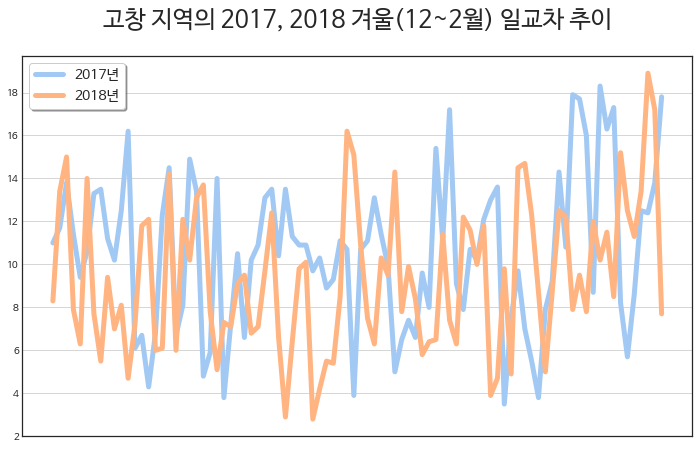

In [ ]:
colors = sns.color_palette('pastel', 2)
plt.figure(figsize=(12, 7))
plt.plot(range(len(diffTa_2017)), diffTa_2017, color=colors[0], label='2017년', linewidth=5)
plt.plot(range(len(diffTa_2018)), diffTa_2018, color=colors[1], label='2018년', linewidth=5)
plt.title("고창 지역의 2017, 2018 겨울(12~2월) 일교차 추이", pad=30, size=24)
plt.grid(axis='y')
plt.legend(fontsize=14, fancybox=True, shadow=True, frameon=True, facecolor='white', loc='upper left')
plt.xticks([])
plt.show()

> 전반적으로 2017년이 더 높아보입니다만 더 정확한 수치로 보고자 한다면 동 기간내의 평균값을 계산하는 것이 바람직하다고 판단했습니다.

In [ ]:
print(diffTa_2017.mean())
print(diffTa_2018.mean())
print(diffTa_2017.mean() - diffTa_2018.mean())

10.555555555555555
9.38888888888889
1.166666666666666


> 2017년 겨울의 일교차가 2018년 동기간의 일교차에 비해 평균적으로 1.1도만큼 높은 차이를 보이는 것을 알 수 있습니다.

> 이제 전체적인 경향을 위해 `고창`, `순창`, `정읍` 지역의 2016~2021년 겨울로 분석을 확장시키고 시각화해보겠습니다.

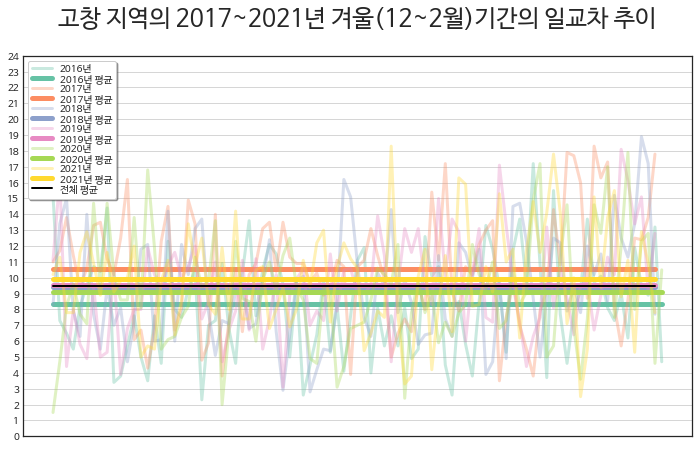

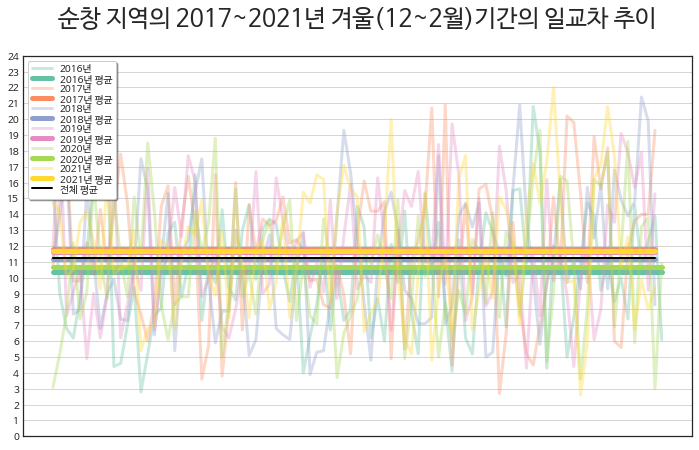

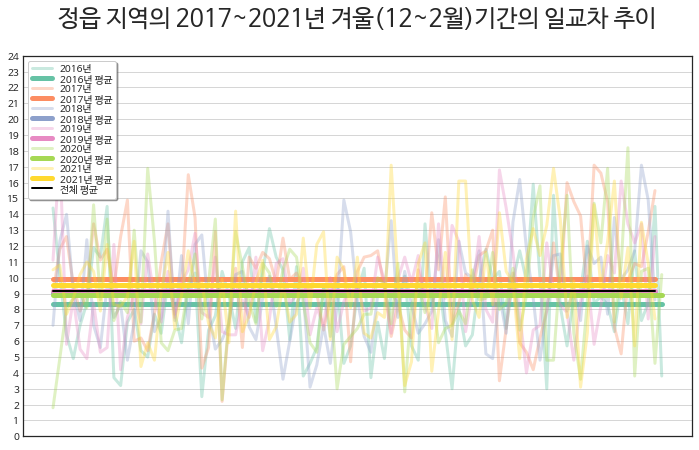

In [ ]:
# 지역별 일교차의 평균을 저장할 딕셔너리
mean_diffTa = {}
# plotting colors
colors = sns.color_palette('Set2', 6)
for k in ASOS_dict.keys():
    # 각 지역의 연도별 일교차를 저장할 딕셔너리
    diffTa = {}
    for year in range(2016, 2021+1):
        diffTa[year] = ASOS_dict[k][((ASOS_dict[k]['year'] == year-1)&(ASOS_dict[k]['month'] == 12))|
                                    ((ASOS_dict[k]['year'] == year)&(ASOS_dict[k]['month'] <= 2))]['diffTa']
    # 각 지역의 연도별 일교차의 평균을 저장할 리스트
    means = []
    # 각 지역의 일교차의 평균을 저장할 딕셔너리
    mean_diffTa[k] = {}
    plt.figure(figsize=(12, 7))
    for idx, y in enumerate(diffTa.keys()):
        X = range(len(diffTa[y]))
        # 계산의 편리를 위해 리스트에 연도별 일교차를 저장
        _mean = diffTa[y].mean()
        means.append(_mean)
        # 해당 값을 지역별 딕셔너리에도 추가
        mean_diffTa[k][y] = _mean
        # 전체 추이 plot
        plt.plot(X, diffTa[y], label=f'{y}년', c=colors[idx], alpha=0.35, linewidth=3)
        # 평균 plot
        plt.plot(X, [_mean for _ in range(len(X))], label=f'{y}년 평균', c=colors[idx], linewidth=5)
    
    # 각 지역의 2017~2021년 겨울 일교차의 전체 평균 값을 계산
    total_mean = sum(means)/len(means)
    mean_diffTa[k]["total"] = total_mean
    # 마지막 기간과 동일한 길이로 평균값을 plot
    total_mean_list = [total_mean for _ in range(len(diffTa[y]))]
    plt.plot(range(len(total_mean_list)), total_mean_list, c='black', label="전체 평균", linewidth=2)

    plt.title(f"{k} 지역의 2017~2021년 겨울(12~2월)기간의 일교차 추이", pad=30, size=24)
    plt.grid(axis='y')
    plt.legend(fontsize=10, fancybox=True, shadow=True, frameon=True, facecolor='white', labelspacing=0, loc='upper left')
    plt.xticks([])
    plt.yticks(np.arange(25))
    plt.show()

> 위의 세 지역의 연도별 겨울철 일교차 정보를 전반적으로 확인할 수 있도록 시각화해보았습니다.
>
> 평균 일교차로만 시각화하면 아래와 같습니다. 

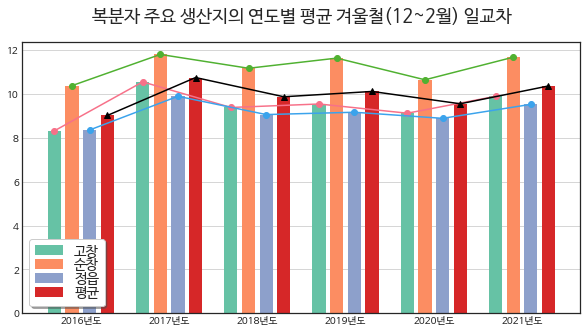

In [ ]:
mean_diffTa_by_years = {}

for y in range(2016, 2021+1):
    mean_diffTa_by_years[y] = []

for k in mean_diffTa.keys():
    for y in range(2016, 2021+1):
        mean_diffTa_by_years[y].append(mean_diffTa[k][y])

colors_bar = sns.color_palette('Set2', 3)
colors_line = sns.color_palette('husl', 3)

X = np.arange(6) - 0.4
plt.figure(figsize=(10, 5))

for idx, k in enumerate(mean_diffTa.keys()):
    y = list(mean_diffTa[k].values())[:-1]
    plt.bar(X+(0.2*idx), y, color=colors_bar[idx], width=0.15, label=k)
    plt.plot(X+(0.2*idx), y, marker='o', color=colors_line[idx])

y = [sum(mean_diffTa_by_years[year])/len(mean_diffTa_by_years[year]) for year in mean_diffTa_by_years.keys()]
plt.bar(X+(0.2*(idx+1)), y, color='tab:red', width=0.15, label='평균')
plt.plot(X+(0.2*(idx+1)), y, marker='^', color='black')

plt.title('복분자 주요 생산지의 연도별 평균 겨울철(12~2월) 일교차', pad=20, size=18)
plt.xticks(X+0.3, [f"{year}년도" for year in range(2016, 2021+1)])
plt.legend(fontsize=14, fancybox=True, shadow=True, frameon=True, facecolor='white', labelspacing=0, loc='lower left')
plt.grid(axis='y')
plt.show()

> 또한 세 지역의 전체 기간 겨울철 일교차 추이는 아래와 같습니다.

In [ ]:
total_mean = []
for k in mean_diffTa.keys():
    print("2016~2021년간 %s 지역 평균 겨울철 일교차 : %.2lf°C"%(k, mean_diffTa[k]['total']))
    total_mean.append(mean_diffTa[k]['total'])
total_mean_diffTa = sum(total_mean)/len(total_mean)
print("2016~2021년간 복분자 주요 재배 지역 평균 겨울철 일교차 : ", "%.2lf°C"%(total_mean_diffTa))

2016~2021년간 고창 지역 평균 겨울철 일교차 : 9.47°C
2016~2021년간 순창 지역 평균 겨울철 일교차 : 11.22°C
2016~2021년간 정읍 지역 평균 겨울철 일교차 : 9.15°C
2016~2021년간 복분자 주요 재배 지역 평균 겨울철 일교차 :  9.95°C


> 위와 같은 시각화 자료들로 유추할 수 있는 내용은 다음과 같습니다.
>
>>🌦 평균 `일교차가 가장 컸던 연도`는 `2017년`이고 `가장 작았던 연도`는 `2016년`이다.
>>
>>🌡 `2017~2021년`동안 `복분자 주요 재배 지역의 평균 겨울철 일교차`는 <strong>`9.95°C`</strong>이다.
>>
>>⛰ 세 지역의 일교차는 대체로 `순창 > 고창 > 정읍` 순으로 높은 경향을 띈다.
>>
>>

---

> 다음으로 `한 해 동안의 복분자 생산량과 가격`을 구해보겠습니다.

> 먼저, 생산량의 기준은 한국임업진흥원의 데이터에서 집계된 거래량을 기준으로 한다는 것을 다시 한 번 언급합니다.
>
> 생산량 집계 기간은 `수확시기`인 7월에서 여유를 두고 `6월부터 이듬해 5월까지`를 기준으로 합니다.
>
>> 즉, 2017년일 경우 2017년 6월부터 2018년 5월까지를 2017년의 생산량이라고 보는 것입니다.
>
> 생산량을 계산할 때에는 앞선 가설에 따라 생산량이 줄어들면 거래량도 줄어든다는 논리적 접근을 통해 `위에서 언급한 기간동안의 총 거래량`을 계산하여 `생산량`이라고 가정하고자 합니다.
>
>> 이때 거래량은 규격에 따라 계산되어야 합니다. 규격은 kg, g이 존재하며 1kg=1000g이므로 이를 염두에 두고 분석을 진행했습니다.

In [ ]:
korean_black_raspberry_df.head(3)

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격
0,2016,4,26,20160426,부산반여도매,복분자,복분자(일반),1.0,1,kg,특,10000
1,2016,4,27,20160427,부산반여도매,복분자,복분자(일반),1.0,1,kg,특,9000
2,2016,4,29,20160429,부산반여도매,복분자,복분자(일반),1.0,3,kg,특,10200


> 한 행에서 거래된 `거래량`은 $거래단량 \times 거래량(kg)$입니다.
>
> 가령 2번 인덱스의 2016년 4월 29일의 거래를 보면 거래단량이 1.0, 거래량이 3이고 규격이 kg이므로 거래량은 $$1.0 \times 3 = 3kg$$ 이라고 할 수 있습니다.

> 또한 가격은 규격별 거래단량에 대한 금액으로 앞서 예를 들은 거래에서는 $1kg = 10,200원$을 의미합니다.
>
> 그리고 `거래총액`은 $거래량 \times 가격$이므로 $3 \times 10200 = 30,600원$이 해당 거래의 총 거래 금액이라고 할 수 있습니다.

> 이제 kg 단위로 보정된 `실거래량`과 `거래총액`에 해당하는 column을 만들도록 하겠습니다.

> 우선 규격이 g인 거래를 조회해보도록 하겠습니다.

In [ ]:
korean_black_raspberry_df[korean_black_raspberry_df['규격'] == 'g']

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격
1966,2017,6,12,20170612,구리도매시장,복분자,복분자(일반),500.0,215,g,없음,7457
2844,2018,6,21,20180621,수원도매시장,복분자,복분자(일반),500.0,2,g,없음,10000
3253,2019,6,25,20190625,수원도매시장,복분자,복분자(일반),500.0,4,g,없음,2500
3462,2020,7,3,20200703,수원도매시장,복분자,복분자(일반),500.0,9,g,없음,1500


> 총 4개이며 거래단량이 500으로 동일한 것을 확인할 수 있습니다
> 
> 이에 따라 규격을 kg으로 보정하고 거래단량은 0.5로 보정해주겠습니다.

In [ ]:
idxs = korean_black_raspberry_df[korean_black_raspberry_df['규격'] == 'g'].index
for idx in idxs:
    korean_black_raspberry_df.at[idx, '규격'] = 'kg'
    korean_black_raspberry_df.at[idx, '거래단량'] = 0.5

In [ ]:
korean_black_raspberry_df.iloc[idxs]

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격
1966,2017,6,12,20170612,구리도매시장,복분자,복분자(일반),0.5,215,kg,없음,7457
2844,2018,6,21,20180621,수원도매시장,복분자,복분자(일반),0.5,2,kg,없음,10000
3253,2019,6,25,20190625,수원도매시장,복분자,복분자(일반),0.5,4,kg,없음,2500
3462,2020,7,3,20200703,수원도매시장,복분자,복분자(일반),0.5,9,kg,없음,1500


> 이제 규격을 모두 kg으로 맞춰줬습니다.

In [ ]:
korean_black_raspberry_df['규격'].unique()

array(['kg'], dtype=object)

> 본격적으로 `실거래량(kg)`을 데이터 프레임에 추가하겠습니다.

In [ ]:
korean_black_raspberry_df['거래단량'].unique()

array([ 1.  ,  0.5 ,  2.  ,  4.  , 10.  ,  0.3 ,  5.  ,  8.  ,  2.5 ,
        7.5 ,  0.8 ,  3.  ,  0.4 ,  0.7 ,  9.  , 12.  ,  1.4 ,  1.5 ,
        1.6 ,  7.  ,  0.6 ,  2.75,  0.9 ,  6.  , 20.  , 11.  , 18.  ,
       24.  , 27.  , 30.  ,  8.5 , 19.  , 11.5 , 32.  , 15.  , 35.  ,
       31.  , 29.  , 27.5 ,  1.2 ,  1.1 , 14.  , 22.5 , 16.  ,  0.25,
       13.  ,  0.55])

> 거래단량은 1이 많지만 그외의 값들도 다수 존재합니다. 하지만 모두 kg 단위이므로 거래단량과 거래량을 곱하면 실제 거래된 kg단위의 양을 알 수 있을 것입니다.

In [ ]:
korean_black_raspberry_df['실거래량(kg)'] = korean_black_raspberry_df['거래단량'] * korean_black_raspberry_df['거래량']

In [ ]:
korean_black_raspberry_df.tail()

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격,실거래량(kg)
3527,2020,7,22,20200722,대구북부도매,복분자,복분자(일반),1.00,50,kg,특,3000,50.00
3528,2020,7,22,20200722,부산엄궁도매,복분자,복분자(일반),1.00,12,kg,특,7800,12.00
3529,2020,7,24,20200724,전주도매시장,복분자,복분자(일반),0.55,13,kg,특,1200,7.15
3530,2020,7,27,20200727,구미도매시장,복분자,복분자(일반),1.00,2,kg,특,4400,2.00
3531,2020,7,27,20200727,부산엄궁도매,복분자,복분자(일반),1.00,18,kg,특,7500,18.00


> 다음으로 `거래총액`은 거래량과 가격을 곱한 값입니다.
>
> 결국 거래총액을 실거래량으로 나누면 `1kg당 가격`을 구할 수 있게되므로 유용하게 분석할 수 있습니다.

In [ ]:
korean_black_raspberry_df['거래총액'] = korean_black_raspberry_df['거래량'] * korean_black_raspberry_df['가격']

In [ ]:
korean_black_raspberry_df.tail()

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격,실거래량(kg),거래총액
3527,2020,7,22,20200722,대구북부도매,복분자,복분자(일반),1.00,50,kg,특,3000,50.00,150000
3528,2020,7,22,20200722,부산엄궁도매,복분자,복분자(일반),1.00,12,kg,특,7800,12.00,93600
3529,2020,7,24,20200724,전주도매시장,복분자,복분자(일반),0.55,13,kg,특,1200,7.15,15600
3530,2020,7,27,20200727,구미도매시장,복분자,복분자(일반),1.00,2,kg,특,4400,2.00,8800
3531,2020,7,27,20200727,부산엄궁도매,복분자,복분자(일반),1.00,18,kg,특,7500,18.00,135000


> `1kg당 가격`은 유용하게 쓰일 것 같으므로 데이터 프레임에 추가해주겠습니다.

In [ ]:
korean_black_raspberry_df['kg당가격'] = korean_black_raspberry_df['거래총액']/korean_black_raspberry_df['실거래량(kg)']

In [ ]:
korean_black_raspberry_df.tail()

,year,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격,실거래량(kg),거래총액,kg당가격
3527,2020,7,22,20200722,대구북부도매,복분자,복분자(일반),1.00,50,kg,특,3000,50.00,150000,3000.000000
3528,2020,7,22,20200722,부산엄궁도매,복분자,복분자(일반),1.00,12,kg,특,7800,12.00,93600,7800.000000
3529,2020,7,24,20200724,전주도매시장,복분자,복분자(일반),0.55,13,kg,특,1200,7.15,15600,2181.818182
3530,2020,7,27,20200727,구미도매시장,복분자,복분자(일반),1.00,2,kg,특,4400,2.00,8800,4400.000000
3531,2020,7,27,20200727,부산엄궁도매,복분자,복분자(일반),1.00,18,kg,특,7500,18.00,135000,7500.000000


> 먼저 연도별로 거래가 얼마나 발생했는지 조회해보겠습니다.

In [ ]:
korean_black_raspberry_df.groupby('year').count()

,month,day,경락일,도매시장,품목,세부품목,거래단량,거래량,규격,등급,가격,실거래량(kg),거래총액,kg당가격
year,,,,,,,,,,,,,,
2016,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866
2017,740,740,740,740,740,740,740,740,740,740,740,740,740,740
2018,457,457,457,457,457,457,457,457,457,457,457,457,457,457
2019,352,352,352,352,352,352,352,352,352,352,352,352,352,352
2020,117,117,117,117,117,117,117,117,117,117,117,117,117,117


> 단순 거래량이 2016년대비 2020년에 약 16배가량 차이나는 것을 확인했습니다.
>
> 본 데이터의 마지막 거래일이 2020년 7월이고 하반기에 복분자 거래가 한번도 진행되지 않은 것은 맞지 않으므로 아직 집계가 되지 않았다고 추론해볼 수 있습니다.
>
> 따라서 본 분석에서는 2020년 데이터는 사용하지 않고 2019년까지의 데이터만 사용하고자 합니다.

> 본 분석에서의 연도기준은 앞서 설명한대로 6월부터 이듬해 5월까지입니다.
>
> 이를 토대로 시각화해보면 아래와 같습니다.

In [ ]:
actual_sales_kg = {}
for y in range(2016, 2019+1):
    actual_sales_kg[y] = korean_black_raspberry_df[((korean_black_raspberry_df['year']==y)&(korean_black_raspberry_df['month']>=6))|
                                                   ((korean_black_raspberry_df['year']==y+1)&(korean_black_raspberry_df['month']<=5))]['실거래량(kg)'].sum()

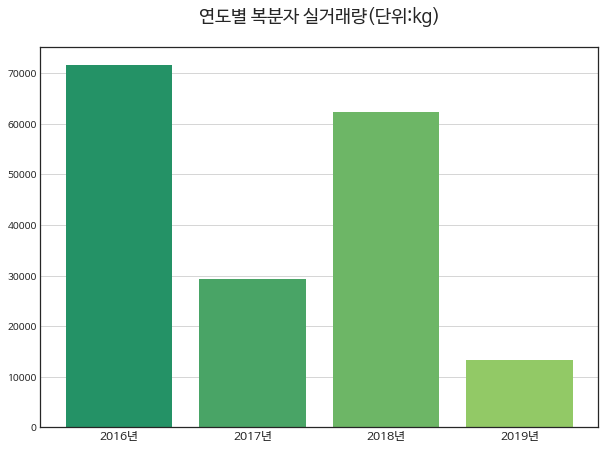

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(actual_sales_kg)), actual_sales_kg.values(), color=sns.color_palette('summer'))
plt.xticks(range(len(actual_sales_kg)), [f'{y}년' for y in range(2016, 2019+1)], size=12)
plt.grid(axis='y')
plt.title('연도별 복분자 실거래량(단위:kg)', pad=25, fontsize=18)
plt.show()

> 확실히 실거래량으로 계산하니 2018년도의 양이 달라졌음을 알 수 있었습니다.
>
> 또한 일교차가 가장 적은 2016년의 실거래량이 가장 높은 것으로 미루어보아 그 생산량이 타 해보다 많았다고 생각할 수 있을 것 같습니다.
>
> 그리고 2019년의 거래량이 굉장히 적게 나타나는데 이는 자연현상과 더불어 19년 12월에 시작된 코로나의 영향도 고려해야한다고 생각합니다.
>
> 따라서 결론적으로 2017년에 실거래량이 줄어들었으므로 가설에 따라 품귀현상이 발생하여 가격이 높아졌는지 확인해보겠습니다.

> 분석 초기에는 거래총액을 사용하려했으나 그보다 `kg당 가격`이 물가를 더 잘 반영하는 지표라고 판단하였고, 따라서 kg당 가격의 평균을 연도별로 시각화해보도록 하겠습니다.

In [ ]:
price_per_kg = {}
for y in range(2016, 2019+1):
    price_per_kg[y] = korean_black_raspberry_df[((korean_black_raspberry_df['year']==y)&(korean_black_raspberry_df['month']>=6))|
                                                   ((korean_black_raspberry_df['year']==y+1)&(korean_black_raspberry_df['month']<=5))]['kg당가격'].mean()

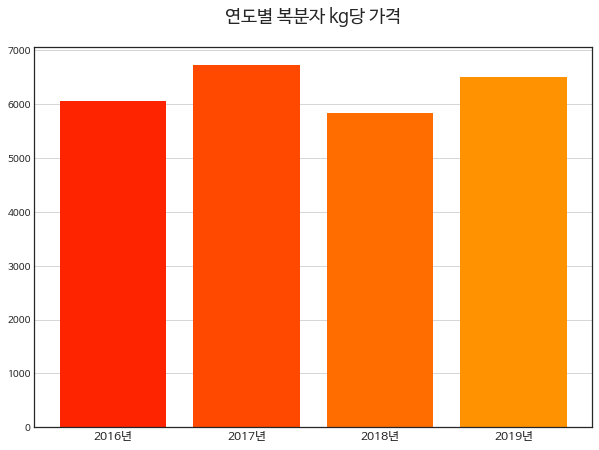

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(price_per_kg)), price_per_kg.values(), color=sns.color_palette('autumn'))
plt.xticks(range(len(price_per_kg)), [f'{y}년' for y in range(2016, 2019+1)], size=12)
plt.grid(axis='y')
plt.title('연도별 복분자 kg당 가격', pad=25, fontsize=18)
plt.show()

#### 1️⃣ 결론

>- 앞선 기상 데이터에서 겨울의 평균 일교차가 가장 컸던 해는 2017년(2016.12~2017.2)이었고 가장 적었던 해는 2016년이었습니다.(2019년까지의 데이터만 고려)
>
>- 그리고 거래량이 가장 적었던 해는 2019년, 많았던 해는 2016년이었습니다.
>
>- 마지막으로 kg당 가격이 가장 높았던 것은 2017년이고 가장 적었던 것은 2018년, 두번쨰로 적은 것이 2016년이었습니다.
>
>---
>
> 결론적으로 2019년에 발생한 코로나 쇼크로 인해 거래량이 줄어든 것을 감안할 때, 제가 세웠던 아래와 같은 가설이 올바른 경향성을 보인다고 말할 수 있습니다.
> 
>> `겨울철(12~1월) 일교차에 따라 복분자 생산량이 감소할 것으로 예상되므로 품귀 현상이 발생해 가격이 상승할 것이다.`
> 
>---
>
> 이를 통해 `겨울철 일교차`가 `복분자`라는 작물의 `생산량`과 `거래량` 그리고 `가격`에 영향을 주는 요인이라고 생각해볼 수 있습니다.

---

### 2️⃣ 겨울이 지나고 `3월부터 수확철인 8월까지`의 `지면 30cm 온도가 높을 수록` 낮과 밤의 일교차로 인한 습도가 증가할 수 있으므로 `생산량이 떨어져` `가격이 상승`할 것이다.

> 본 가설에서 `정읍` 지역의 기상 데이터에 `지면 30cm 평균 온도(avgCm30Te)` 값이 없기 때문에 `고창`, `순창` 지역의 기상 데이터만을 활용합니다.

> 앞서 가격에 대한 분석은 진행했으므로 지면 30cm 평균 온도를 시각화해보겠습니다.
>
> 우선 고창과 순창 지역의 2016~2021년 3월부터 8월의 `avgCm30Te` 값을 슬라이싱합니다.

In [ ]:
avgCm30Te_by_area = {}
for k in ['고창', '순창']:
    avgCm30Te_by_area[k] = {}
    for y in range(2016, 2021+1):
        avgCm30Te_by_area[k][y] = list(ASOS_dict[k][((ASOS_dict[k]['year']==y)&(ASOS_dict[k]['month']>=3))&
                                                ((ASOS_dict[k]['year']==y)&(ASOS_dict[k]['month']<=8))]['avgCm30Te'])

> 다음으로 두 지역의 평균으로 구성된 연도별 지면 30cm 평균 온도 딕셔너리로 재구성합니다.

In [ ]:
avgCm30Te_by_year = {}
for year in range(2016, 2021+1):
   avgCm30Te_by_year[year] = [sum(elements)/len(elements) for elements in zip(avgCm30Te_by_area['고창'][year], avgCm30Te_by_area['순창'][year])]

> 다른 처리없이 시각화하면 아래와 같습니다.

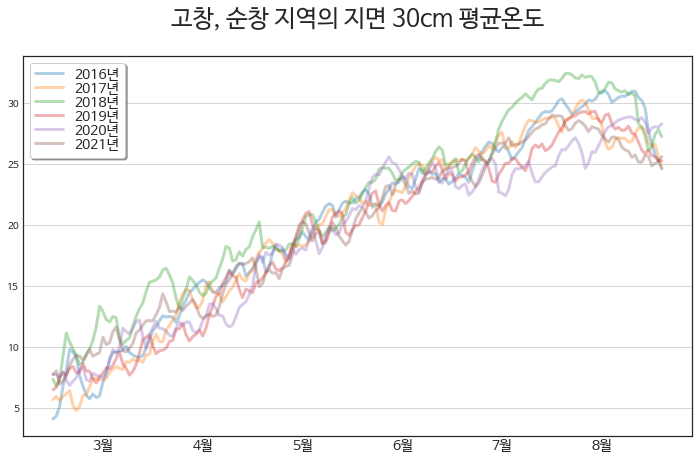

In [ ]:
plt.figure(figsize=(12, 7))

for year in range(2016, 2021+1):
    plt.plot(range(len(avgCm30Te_by_year[year])), avgCm30Te_by_year[year], alpha=0.35, linewidth=3, label=f"{year}년")

plt.title("고창, 순창 지역의 지면 30cm 평균온도", pad=30, size=24)
plt.grid(axis='y')
plt.legend(fontsize=14, fancybox=True, shadow=True, frameon=True, facecolor='white', labelspacing=0, loc='upper left')
plt.xticks(range(len(avgCm30Te_by_year[year])), [f'{m//30 + 2}월' if m % 30 == 0 else '' for m in range(15, len(avgCm30Te_by_year[year])+15)], size=14)
plt.show()

> 연도별 평균값을 구해 시각화하면 아래와 같습니다.

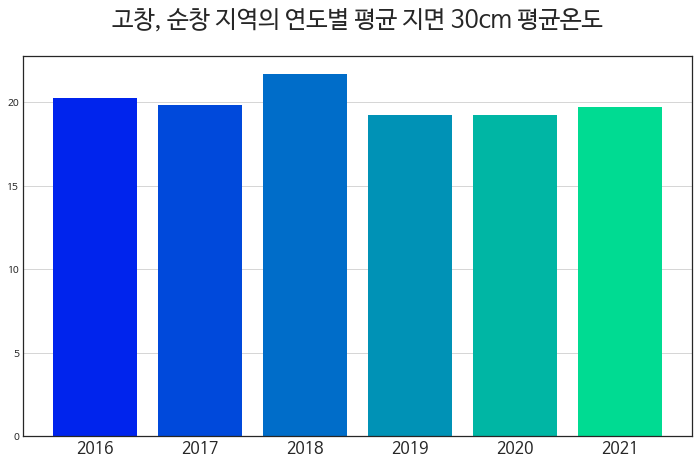

In [ ]:
plt.figure(figsize=(12, 7))
colors = sns.color_palette('winter')

X = np.arange(2016, 2021+1)
y = [sum(avgCm30Te_by_year[year])/len(avgCm30Te_by_year[year]) for year in range(2016, 2021+1)]

plt.bar(X, y, color=colors)

plt.title("고창, 순창 지역의 연도별 평균 지면 30cm 평균온도", pad=30, size=24)
plt.grid(axis='y')
plt.xticks(X, size=16)
plt.show()

#### 2️⃣ 결론

>- 앞선 가설1️⃣에서 분석한 결과에 따르면 (2016~2019년 기준) 2018년도의 가격이 가장 낮았고, 2018년의 거래량은 2016년에 이어 두번째로 높았습니다.
>
>- 하지만 지면 30cm 평균온도는 2018년이 가장 높고 2016년이 두번째로 높은 결과를 보였습니다.
>
>- 거래량이 많다는 것은 생산량이 많다고 판단할 수 있으므로 2016년의 생산량이 가장 높고, 2018년이 그 뒤를 잇는다고 생각해볼 수 있습니다.
>
>---
>
> 결론적으로 지면 30cm 평균온도가 높을수록 오히려 생산량과 거래량이 증가하는 경향이 있고 그 결과 공급이 많아지면서 가격은 하락했으므로 제가 제시한 아래의 가설과 결과가 반대라고 해석할 수 있습니다.
> 
>> `겨울이 지나고 3월부터 수확철인 8월까지의 지면 30cm 온도가 높을 수록 낮과 밤의 일교차로 인한 습도가 증가할 수 있으므로 생산량이 떨어져 가격이 상승할 것이다.`
> 
>---
>
> 그러나 지면 30cm 평균온도라는 변수가 생산량 및 거래량, 가격에 미치는 영향이 매우 크다고 보기는 힘들며 `경향성을 가지고 있는 정도로만 해석`하는 것이 바람직해 보입니다.

---

### 3️⃣ 겨울이 지나고 `3월부터 수확철인 8월까지`의 `강수량이 증가`하면 `생산량이 떨어져` `가격이 상승`할 것이다.`

> 일교차, 지면 30cm 평균온도를 거쳐 마지막으로 강수량이 복분자의 생산량, 거래량 및 가격에 미치는 영향을 분석해보는 것으로 마무리하도록 하겠습니다.

> 먼저 강수량에 대해 연도별로 시각화해보도록 하겠습니다.
>
> 강수량은 비가 오지 않을 때가 더 많으므로 월 단위로 주요 생산지의 평균 강수량을 계산해 시각화하겠습니다.

In [ ]:
sumRn_by_year = {}

for year in range(2016, 2021+1):
    sumRn_by_year[year] = {}
    for month in range(3, 8+1):
        mean_by_area = []
        for k in ASOS_dict.keys():
            mean_by_area.append(ASOS_dict[k][((ASOS_dict[k]['year']==year)&(ASOS_dict[k]['month']==month))]['sumRn'].mean())
        sumRn_by_year[year][month] = sum(mean_by_area)/len(mean_by_area)

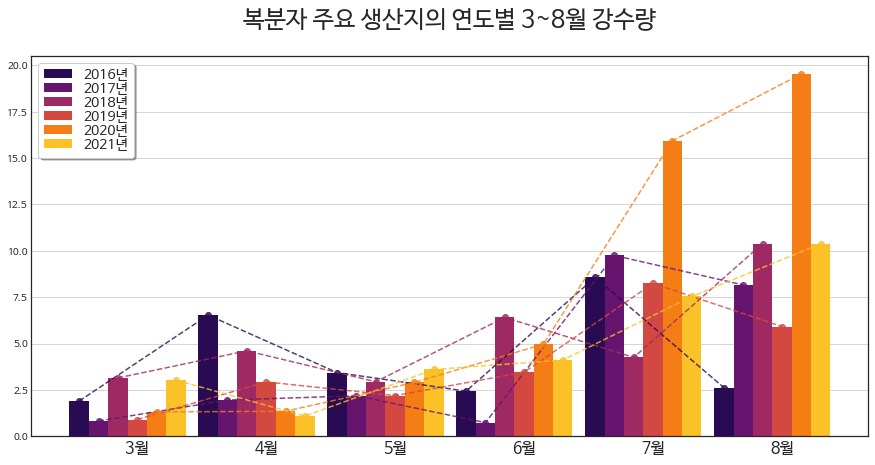

In [ ]:
plt.figure(figsize=(15, 7))
colors = sns.color_palette('inferno', 6)

X = np.arange(3, 8+1)-0.45
for idx, year in enumerate(range(2016, 2021+1)):
    plt.bar(X+(0.15*idx), sumRn_by_year[year].values(), color=colors[idx], width=0.15, label=f'{year}년')
    plt.plot(X+(0.15*idx), list(sumRn_by_year[year].values()), color=colors[idx], marker='o', linestyle='dashed', alpha=0.8)
plt.title("복분자 주요 생산지의 연도별 3~8월 강수량", pad=30, size=24)
plt.grid(axis='y')
plt.legend(fontsize=14, fancybox=True, shadow=True, frameon=True, facecolor='white', labelspacing=0, loc='upper left')
plt.xticks(X+0.45, [f"{m}월" for m in range(3, 8+1)], size=16)
plt.show()

> 연도별 강수량의 총합을 시각화하면 아래와 같습니다.

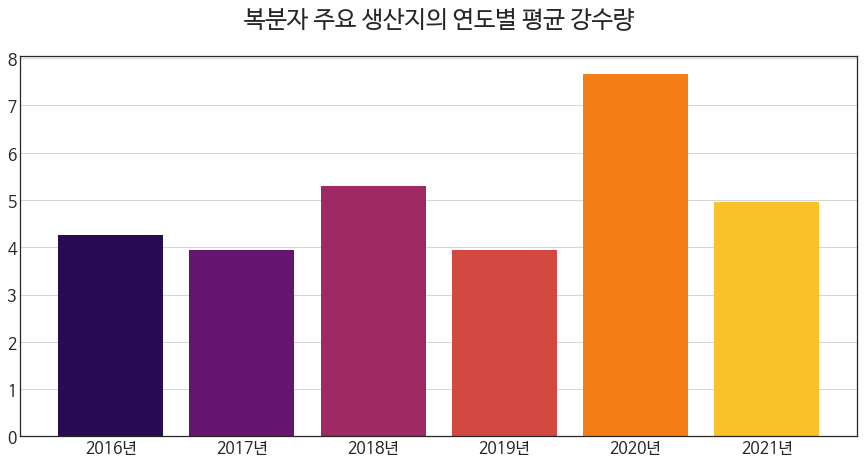

In [ ]:
plt.figure(figsize=(15, 7))
colors = sns.color_palette('inferno')

X = np.arange(2016, 2021+1)

plt.bar(X, [sum(sumRn_by_year[year].values())/len(sumRn_by_year[year].values()) for year in range(2016, 2021+1)], color=colors)
    
plt.title("복분자 주요 생산지의 연도별 평균 강수량", pad=30, size=24)
plt.grid(axis='y')
plt.xticks(X, [f"{y}년" for y in X], size=16)
plt.yticks(size=16)
plt.show()

#### 3️⃣ 결론

>- 복분자 데이터가 존재하는 2016~2019년의 월별 강수량과 평균 강수량은 7-8월에 가장 높고 `2018 > 2016 > 2017 >= 2019` 순서로 높은 것을 확인할 수 있습니다.
>
>- 앞선 가설1️⃣에서 분석한 결과 생산량(=거래량)은 `2016 > 2018 > 2017 > 2019` 순서로 많고, 가격은 `2017 > 2019 > 2016 > 2018` 순서로 높음을 알 수 있었습니다.
>
>- 이때 평균 강수량의 역순이 kg당 가격임을 알 수 있습니다. 따라서, 강수량이 높을수록 가격이 낮아진다는 상관관계를 확인할 수 있습니다.
>
>---
>
> 결론적으로 강수량이 높으면 가격이 내려가고 그 원인이 강수량의 증가로 인한 생산량 증가라고 볼 수 있을 것 같습니다.
>
>> 추가적으로 강수량이 가장 높은 2018년도의 경우 생산량은 2번째이고, 그에 이어 강수량이 2번쨰로 높은 2016년도의 경우 생산량은 1번째인 것을 발견했습니다.
>>
>> 이는 `지나치게 많은 강수량은 작물에 피해를 가져다주기 때문`으로 해석될 수 있을 것 같고, 다시말해 복분자의 생산량이 최고인 연별 평균 강수량의 범위가 약 `4~5mm` 사이일 것으로 예측해볼 수도 있을 것 같습니다.
>
> 정리하자면 강수량이 높으면 가격이 낮아지는 상관관계가 존재하므로 제가 제시한 아래의 가설은 맞지 않고, 오히려 그의 역이 맞을 수 있다고 할 수 있겠습니다. 
> 
>> `겨울이 지나고 3월부터 수확철인 8월까지의 강수량이 증가하면 생산량이 떨어져 가격이 상승할 것이다.`

---

## 이상으로 데이터 분석의 전과정을 마쳤습니다!

> 긴 글 읽어주셔서 대단히 감사합니다.🙏🏻
